<a href="https://www.kaggle.com/code/kirtimathur/car-dekho-eda?scriptVersionId=123047061" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


# Reading and understanding the data

In [2]:
df=pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


#### Describing the numerical columns

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


#### Describing the categorical columns

In [7]:
df.describe(include=object).T

,count,unique,top,freq
name,4340,1491,Maruti Swift Dzire VDI,69
fuel,4340,5,Diesel,2153
seller_type,4340,3,Individual,3244
transmission,4340,2,Manual,3892
owner,4340,5,First Owner,2832


# Preprocessing 

In [8]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [9]:
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [10]:
df["owner"]=df["owner"].replace("First Owner","1")
df["owner"]=df["owner"].replace("Second Owner","2")
df["owner"]=df["owner"].replace("Third Owner","3")
df["owner"]=df["owner"].replace("Fourth & Above Owner","4")
df["owner"]=df["owner"].replace("Test Drive Car","0")

In [11]:
df["owner"]=df["owner"].astype(int)

In [12]:
df["owner"].dtype

dtype('int64')

In [13]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner             int64
dtype: object

In [14]:
pd.options.display.max_rows=763
#df[df.duplicated()]

# EDA

#### Correlation between numerical columns

In [15]:
df.corr()

,year,selling_price,km_driven,owner
year,1.000000,0.413922,-0.419688,-0.468678
selling_price,0.413922,1.000000,-0.192289,-0.228091
km_driven,-0.419688,-0.192289,1.000000,0.321848
owner,-0.468678,-0.228091,0.321848,1.000000


- Year and selling price have a positive correlation of 0.4.
- Year and kilometer driven have a negative correlation of -0.4.
- Year and owner has a negative correlation of -0.4.

#### Analysis on year of cars sold

#### Selling price year wise

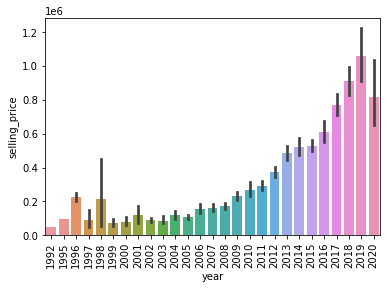

In [16]:
sns.barplot(df["year"],df["selling_price"],data=df)
plt.xticks(rotation=90)
plt.show()

- 2019 had the highest selling price.
- 1992 had the lowest selling price.

#### Kilometer driven by cars per year

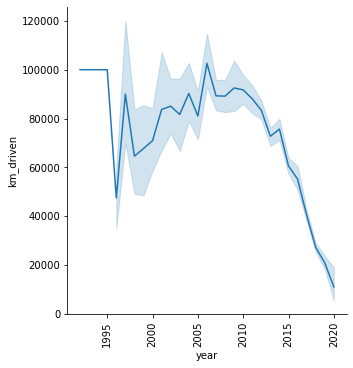

In [17]:
sns.relplot(df["year"],df["km_driven"],data=df,kind="line")
plt.xticks(rotation=90)
plt.show()

In [18]:
df.groupby(["year"])["km_driven"].max().sort_values(ascending=False)

year
2009    806599
2016    560000
2006    400000
2010    350000
2011    312000
2012    296823
2008    270000
2014    260000
2001    256000
2005    250000
2007    230000
2004    223660
2013    222252
2015    210000
2003    165000
2017    160000
2018    120000
2019    120000
2020    120000
2002    120000
2000    120000
1999    120000
1998    120000
1997    120000
1995    100000
1992    100000
1996     60000
Name: km_driven, dtype: int64

- In 2009 maximum km were driven i.e. 806599.
- In 1996 minimum km were driven i.e. 60000.

#### Year wise ownership of cars

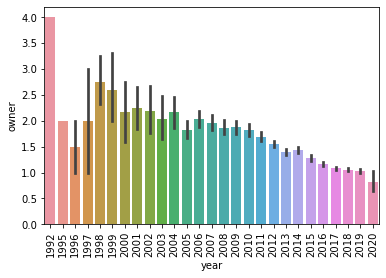

In [19]:
sns.barplot(df["year"],df["owner"],data=df)
plt.xticks(rotation=90)
plt.show()

- Ownerships of cars were more in the previous years, and is gradually decreasing with the years.
- People used to pass on cars more earlier. In 1992, cars on average had 4 owners.
- Now a days people do not prefer much used cars. In 2020,on average cars just had one owner.

In [20]:
#sns.pairplot(df);

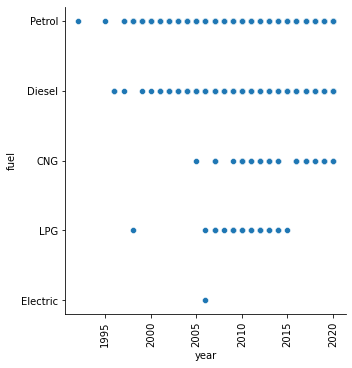

In [21]:
sns.relplot(df["year"],df["fuel"],data=df)
plt.xticks(rotation=90)
plt.show()

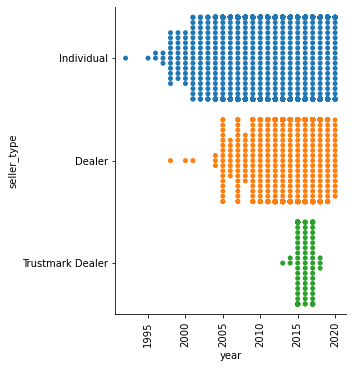

In [22]:
sns.catplot(x="year",y="seller_type",data=df,kind="swarm");
plt.xticks(rotation=90);

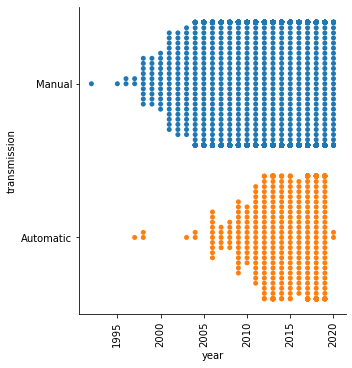

In [23]:
sns.catplot(x="year",y="transmission",data=df,kind="swarm");
plt.xticks(rotation=90);

#### analysis on selling price

<AxesSubplot:xlabel='km_driven'>

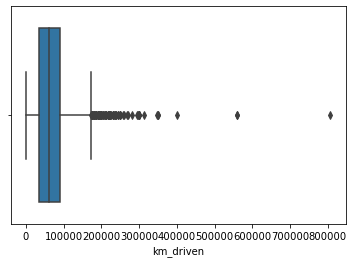

In [24]:
sns.boxplot(df["km_driven"])

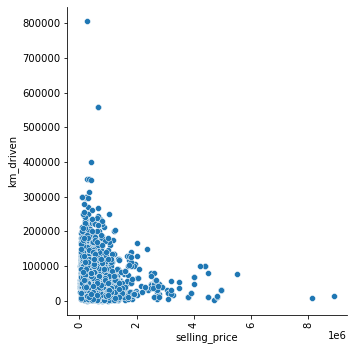

In [25]:
sns.relplot(df["selling_price"],df["km_driven"],data=df)
plt.xticks(rotation=90)
plt.show()

- maximum cars were driven around 3 lakh kms with maximum selling price around 20 lakhs.

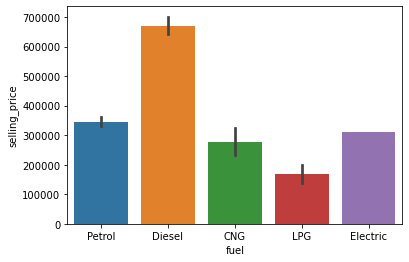

In [26]:
sns.barplot(df["fuel"],df["selling_price"]);

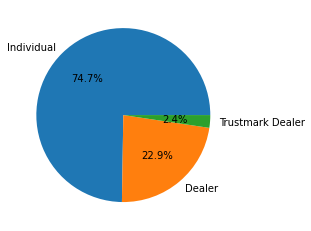

In [27]:
l1=["Individual","Dealer","Trustmark Dealer"] #for labels
plt.pie(df["seller_type"].value_counts(),autopct="%0.01f%%",labels=l1)
plt.show()

In [28]:
#df.groupby("selling_price")["seller_type"].value_counts().sort_values(ascending=False)

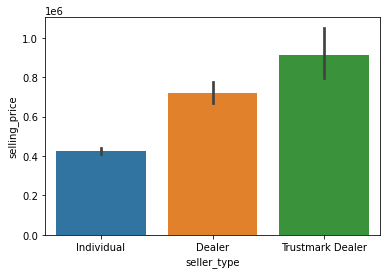

In [29]:
sns.barplot(df["seller_type"],df["selling_price"]);

- individual had prices around average of 4 lakhs.
- dealer had prices around average of 7 lakhs.
- trustmark dealer had prices around average of 9 lakhs.

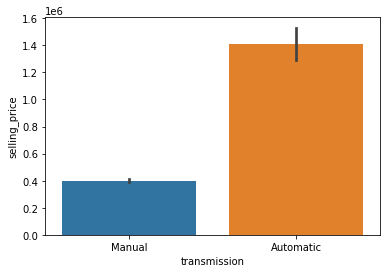

In [30]:
sns.barplot(df["transmission"],df["selling_price"]);

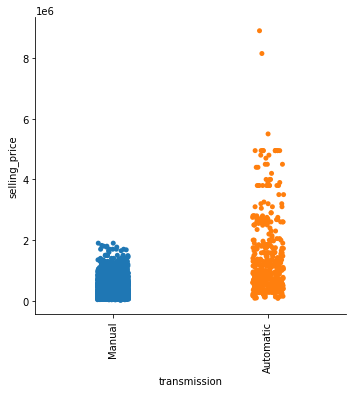

In [31]:
sns.catplot(x="transmission",y="selling_price",data=df);
plt.xticks(rotation=90);

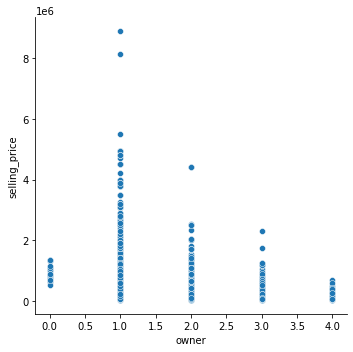

In [32]:
sns.relplot(x="owner",y="selling_price",data=df)

#### analysis on km-driven of cars

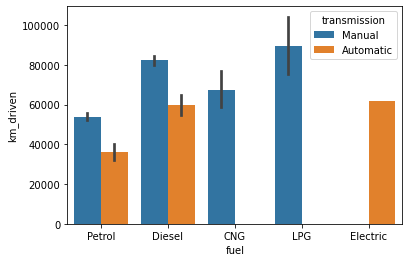

In [33]:
sns.barplot(x="fuel",y="km_driven",hue="transmission",data=df);

#### seller_type

<AxesSubplot:xlabel='owner', ylabel='seller_type'>

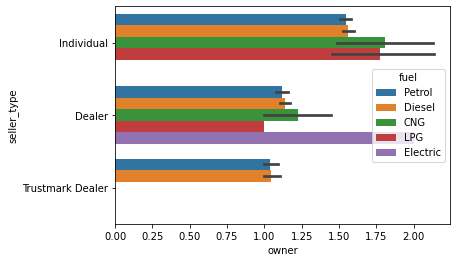

In [34]:
sns.barplot(df["owner"],df["seller_type"],hue=df["fuel"],data=df)

<AxesSubplot:xlabel='transmission', ylabel='count'>

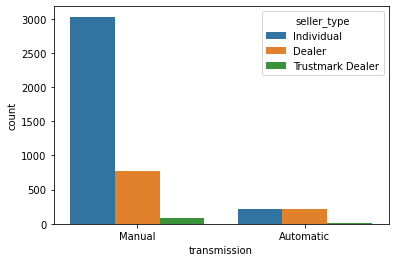

In [35]:
sns.countplot(df["transmission"],hue=df["seller_type"])

<AxesSubplot:xlabel='transmission', ylabel='count'>

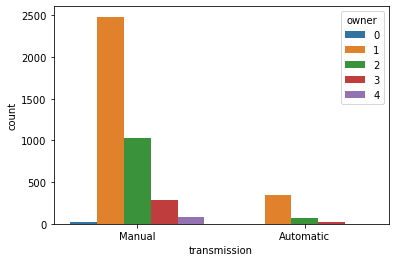

In [36]:
sns.countplot(df["transmission"],hue=df["owner"])